In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor 

from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv', header=0)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


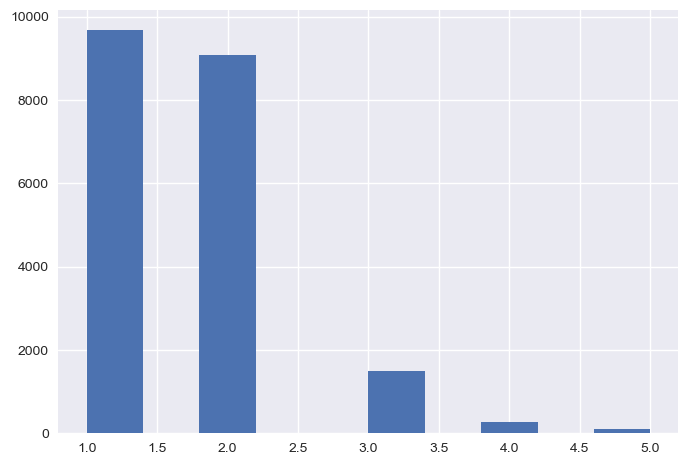

In [5]:
#Using Stratified Sampling to explore the income distribution
plt.style.use('seaborn')

pd.cut(data['median_income'], bins=5, labels=[1,2,3,4,5]).hist()
plt.show()

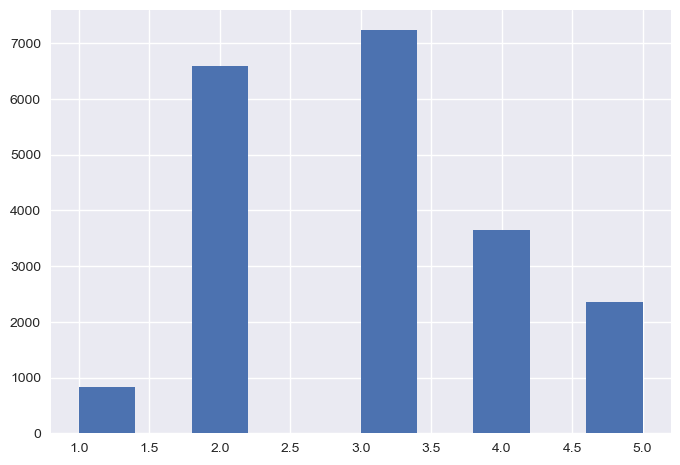

In [6]:
# Histogram with Predefined Stratums 
pd.cut(data['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
      labels=[1,2,3,4,5]).hist()
plt.show()

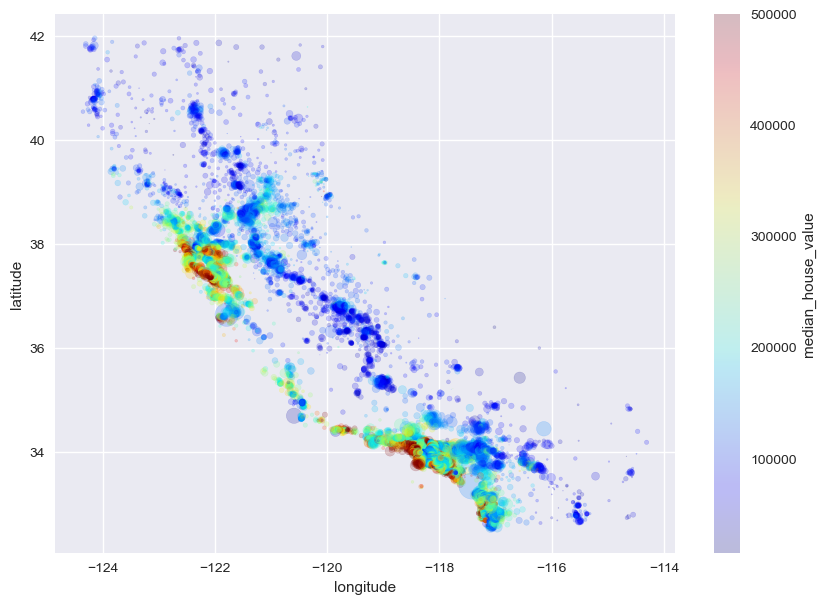

In [9]:
# Visualise
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2,
         colorbar=True,
         s = data['population']/100,
         c = 'median_house_value',
         cmap=plt.get_cmap('jet'),
         figsize=(10, 7))
plt.show()

In [10]:
#Attribute correlation

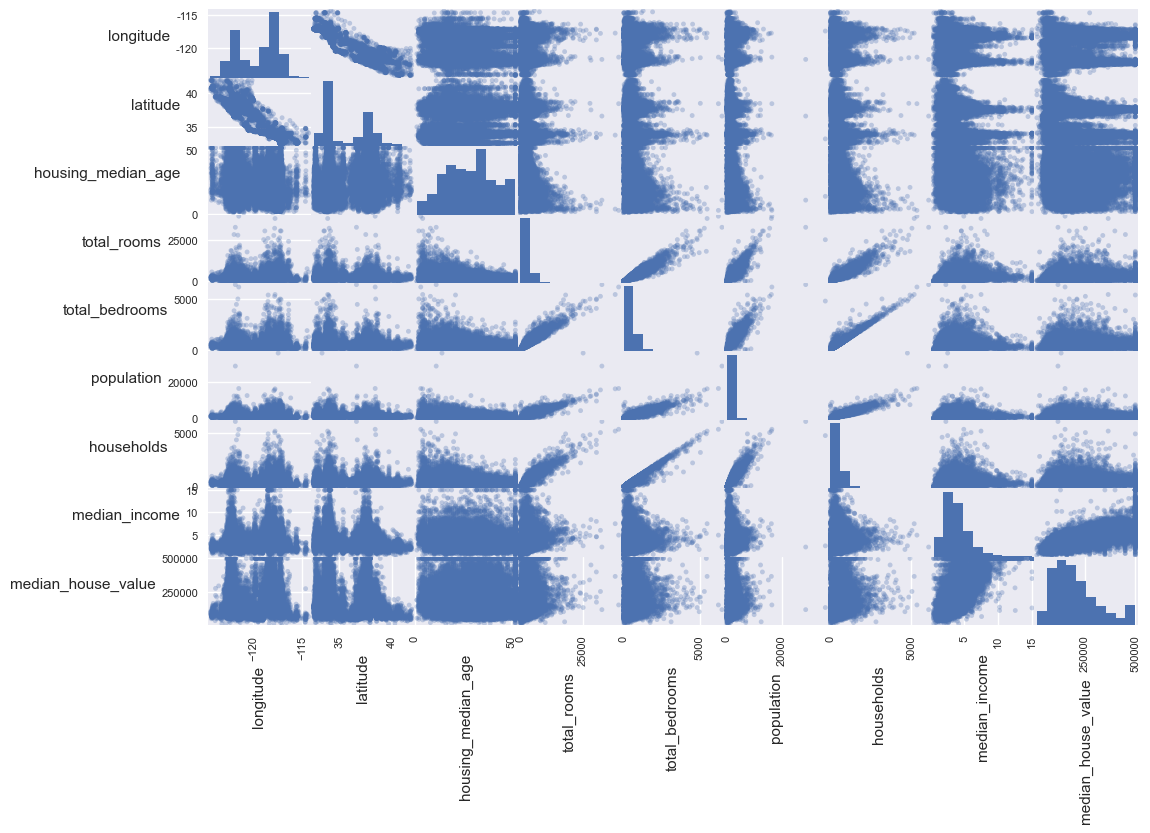

In [11]:
##Scatter Matrix
axes = pd.plotting.scatter_matrix(data, figsize=(12,8), alpha=0.3)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.show()

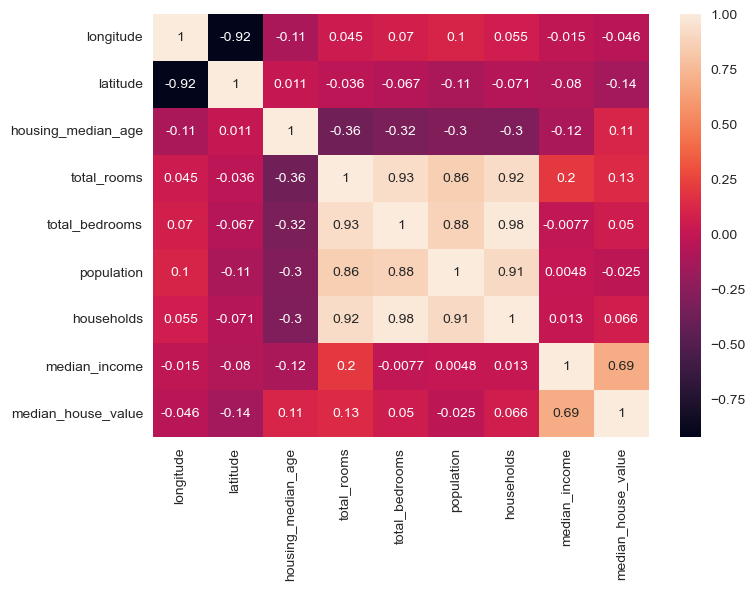

In [12]:
##Correlation Matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
# Top attributes which correlate to median housing value

In [15]:
abs_corr_matrix = abs(data.corr())
abs_corr_matrix.sort_values('median_house_value')['median_house_value']

population            0.024650
longitude             0.045967
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
latitude              0.144160
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [16]:
#  Data Cleaning 

In [17]:
print('Total number of rows : ', len(data))
data.info()

Total number of rows :  20640
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
imputer = SimpleImputer(strategy='median')
total_bedrooms = data['total_bedrooms'].values.reshape(-1, 1)
imputer.fit(total_bedrooms)

data['total_bedrooms'] = imputer.transform(total_bedrooms)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
data_copy = data.copy()
ordinal_encoder = OrdinalEncoder()

ocean_proximity = data_copy['ocean_proximity'].values.reshape(-1, 1)
data_copy['ocean_proximity'] = ordinal_encoder.fit_transform(ocean_proximity)

data_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [21]:
#Feature scaling

Mean of housing_median_age :  3.2711774718776293e-16
Standard Deviation of housing_median_age :  1.000024225686517


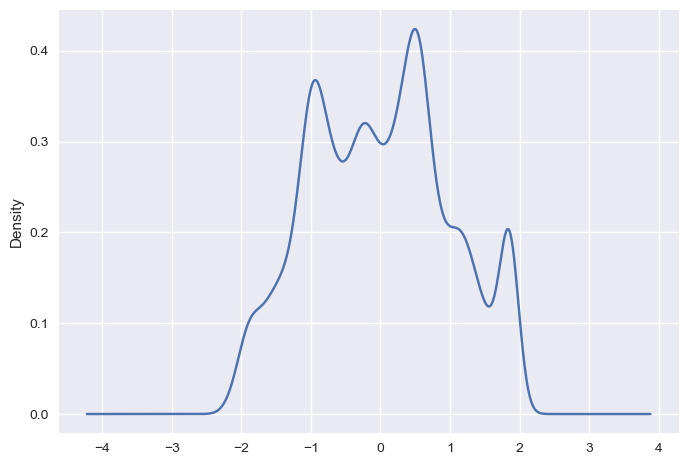

In [26]:
house_median_age = data['housing_median_age'].values.reshape(-1,1)
std_scaler = StandardScaler()
data['housing_median_age'] = std_scaler.fit_transform(house_median_age)

print('Mean of housing_median_age : ', data['housing_median_age'].mean())
print('Standard Deviation of housing_median_age : ', data['housing_median_age'].std())
data['housing_median_age'].plot(kind='density')
plt.show()

In [35]:
# Preprocessing Pipeline
data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv', header=0)
numeric_cols = list(data.select_dtypes(['float64']).columns)
numeric_cols.remove('median_house_value') 
cat_cols = ['ocean_proximity']


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()) 
])


full_pipeline= ColumnTransformer([
    ("num", num_pipeline, numeric_cols), 
    ("cat", OrdinalEncoder(),  cat_cols) 
])

features = full_pipeline.fit_transform(data)
features = pd.DataFrame(data=features, columns=numeric_cols + cat_cols)
targets = data['median_house_value']
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,3.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,3.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,3.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,3.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,3.0


In [37]:
## Chi-Square test
selected_features = []

selector = SelectKBest(f_regression, k='all')
selector.fit_transform(features, targets)
supports = selector.get_support()

print(supports)
print(features.columns)

[ True  True  True  True  True  True  True  True  True]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [38]:
for support, feature in zip(supports, features.columns):
    if(support == True):
        selected_features.append(feature)
print('Selected features: ', selected_features)

Selected features:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


In [39]:
features = features[selected_features]
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,3.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,3.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,3.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,3.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,3.0


In [40]:
#Regression Models

In [42]:
## Simple Regression Model
model = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(features,targets)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('Root mean squared error: ', rmse)

Root mean squared error:  68582.26066159632


In [43]:
## Regularized regression - ridge 
model = Ridge(alpha=0.5)

X_train, X_test, Y_train, Y_test = train_test_split(features,targets)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('Root mean squared error: ', rmse)


Root mean squared error:  71495.03335168096


In [44]:
## Regularized regression - Lasso
model = Lasso(alpha=0.5)

X_train, X_test, Y_train, Y_test = train_test_split(features,targets)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('Root mean squared error: ', rmse)

Root mean squared error:  70567.05474427146


In [45]:
# Cross Validatoin 
k = 10
strata_split = StratifiedShuffleSplit(n_splits=k, test_size=0.3) # 10-fold

stratas = pd.cut(targets, bins=5, labels=[0,1,2,3,4])

models_rmse = {
    'lr' : 0.0, 
    'ridge' : 0.0, 
    'lasso' : 0.0  
}

for train_index, test_index in strata_split.split(features, stratas):
    X_train, Y_train = features.loc[train_index], targets.loc[train_index]
    X_test, Y_test   = features.loc[test_index],  targets.loc[test_index]
    
    lr = LinearRegression().fit(X_train, Y_train)
    ridge = Ridge(alpha=.5).fit(X_train, Y_train)
    lasso = Lasso(alpha=.5).fit(X_train, Y_train)
    
    models_rmse['lr'] += np.sqrt(mean_squared_error(Y_test, lr.predict(X_test)))
    models_rmse['ridge'] += np.sqrt(mean_squared_error(Y_test, ridge.predict(X_test)))
    models_rmse['lasso'] += np.sqrt(mean_squared_error(Y_test, lasso.predict(X_test)))

print('Average RMSE after cross validation of LinearRegression : ', models_rmse['lr']/k)
print('Average RMSE after cross validation of Ridge : ', models_rmse['ridge']/k)
print('Average RMSE after cross validation of Lasso : ', models_rmse['lasso']/k)

Average RMSE after cross validation of LinearRegression :  70062.28388640388
Average RMSE after cross validation of Ridge :  70062.14652276467
Average RMSE after cross validation of Lasso :  70062.22700538629


In [46]:
model = LinearRegression()

scores = cross_val_score(model, features, targets, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)

print('Average RMSE after cross validation of LinearRegression : ', rmse.mean())

Average RMSE after cross validation of LinearRegression :  70651.33935835682


In [47]:
ridge = Ridge()
lasso = Lasso()
hyperparams = [
    {
        'alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    }
]

grid_search = GridSearchCV(ridge, hyperparams, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(features, targets)
print('Best set of hyperparameters for Ridge : ', grid_search.best_params_)

grid_search = GridSearchCV(lasso, hyperparams, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(features, targets)
print('Best set of hyperparameters for Lasso : ', grid_search.best_params_)

Best set of hyperparameters for Ridge :  {'alpha': 0.1}
Best set of hyperparameters for Lasso :  {'alpha': 0.1}


The final RMSE of the best model is :  70181.85004656504
The correlation between the real and predicted values is :  0.800337686884889


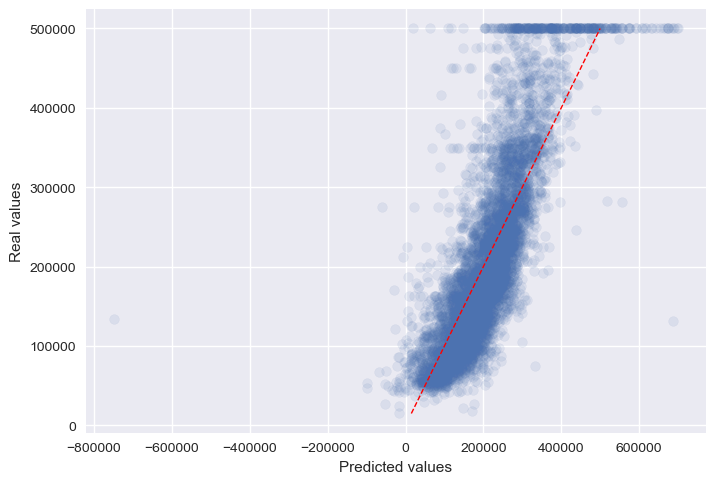

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

final_model = Ridge(alpha=0.1)
final_model.fit(X_train, Y_train)
predictions = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(predictions, Y_test))
corr = np.corrcoef(predictions, Y_test)

print('The final RMSE of the best model is : ', rmse)
print('The correlation between the real and predicted values is : ', corr[0][1])

plt.scatter(predictions, Y_test, alpha=0.1)

# Plot a diagonal to outline the linear relationship between real and predicted values
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

In [53]:
## We can actually improve the model by one-hot encoding the ocean_proximity in the features table after standard scaling the numeric columns

